In [35]:
import pandas as pd
import os, sys

In [36]:
latinos_country = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\latinos_countryOfOrigin.txt", sep='\t')
latinos_country

,eid,CountryCode,Country,Continent
0,2002932.0,603.0,Brazil,600
1,5385995.0,603.0,Brazil,600
2,5264380.0,603.0,Brazil,600
3,5088773.0,603.0,Brazil,600
4,2522434.0,603.0,Brazil,600
...,...,...,...,...
1125,2023014.0,416.0,Guatemala,400
1126,2504745.0,416.0,Guatemala,400
1127,1538342.0,416.0,Guatemala,400
1128,4351326.0,424.0,Nicaragua,400


In [37]:
ukb_demographics = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\ukb_demographics.txt", sep='\t')
ukb_demographics

,eid,Sex,TownsendIndex,EthnicBackground,Age,AssessmentCenter,EthnicGroup
0,5713894.0,Male,-1.63069,British,60.0,11001.0,White
1,2048882.0,Female,-4.55284,British,54.0,11018.0,White
2,1748132.0,Female,-2.80459,British,64.0,11014.0,White
3,3772083.0,Male,-1.24212,British,47.0,11020.0,White
4,4376107.0,Female,-4.07395,Any other white background,63.0,11007.0,White
...,...,...,...,...,...,...,...
501112,2637602.0,Male,-2.81248,British,58.0,11010.0,White
501113,2397350.0,Male,4.47078,British,51.0,11012.0,White
501114,3905086.0,Female,1.69870,British,54.0,11016.0,White
501115,5844444.0,Male,-4.01812,British,43.0,11016.0,White


In [38]:
ukb_latino = pd.merge(latinos_country, ukb_demographics, how='inner', on=['eid'])
ukb_latino['EthnicGroup'] = ukb_latino['EthnicGroup'].replace(['White', 'OtherEthnicity', 'Mixed', 'Chinese', 'Asian', 'Black'],'Latino')
ukb_latino

,eid,CountryCode,Country,Continent,Sex,TownsendIndex,EthnicBackground,Age,AssessmentCenter,EthnicGroup
0,2002932.0,603.0,Brazil,600,Female,-1.139390,British,69.0,11007.0,Latino
1,5385995.0,603.0,Brazil,600,Female,-2.166550,Other ethnic group,42.0,11014.0,Latino
2,5264380.0,603.0,Brazil,600,Male,2.296130,Any other white background,65.0,11018.0,Latino
3,5088773.0,603.0,Brazil,600,Male,7.330950,Any other white background,44.0,11012.0,Latino
4,2522434.0,603.0,Brazil,600,Male,5.077420,Any other white background,42.0,11018.0,Latino
...,...,...,...,...,...,...,...,...,...,...
1107,2023014.0,416.0,Guatemala,400,Male,-0.261213,British,54.0,11018.0,Latino
1108,2504745.0,416.0,Guatemala,400,Female,-4.057050,Any other mixed background,43.0,11017.0,Latino
1109,1538342.0,416.0,Guatemala,400,Female,-5.821450,British,66.0,11007.0,Latino
1110,4351326.0,424.0,Nicaragua,400,Female,-3.384610,British,47.0,11016.0,Latino


In [39]:
latino_df = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\latino_disease.txt")

In [40]:
complications_mental = pd.DataFrame(columns = ["Participants", "Number of complications"])
mental_folder = os.listdir("C:\\Users\\Huy\\Desktop\\Dataset\\cardiovascular")
participant_dict = {}
for file in mental_folder:
    disease_file = pd.read_csv(r"C:\\Users\\Huy\\Desktop\\Dataset\\cardiovascular\\" + file, sep='\t') 
    if file != "desktop.ini":
        for index, row in disease_file.iterrows():
            if row['eid'] not in participant_dict and row['Status'] == 1:
                participant_dict[row['eid']] = 1
            elif row['eid'] in participant_dict and row['Status'] == 1:
                participant_dict[row['eid']] += 1

In [41]:
for eid in participant_dict:
    complications_mental = complications_mental.append({'Participants': eid, 'Number of complications':participant_dict[eid]}, ignore_index=True)
complications_mental = complications_mental.rename(columns = {"Participants": 'eid'})
complications_mental

,eid,Number of complications
0,5002656,1
1,3355943,8
2,2701725,5
3,4144539,1
4,5981800,10
...,...,...
55423,3849413,1
55424,6020166,1
55425,3343247,1
55426,4053439,1


In [42]:
latino_complications = pd.merge(complications_mental, ukb_latino, how='inner', on=['eid'])
condense_complications = latino_complications.drop(['Country', 'CountryCode', 'Continent', 'TownsendIndex', 'EthnicBackground', 'AssessmentCenter', 'EthnicGroup'], axis = 1)
condense_complications.to_csv("cardiovascular_complications.csv")
condense_complications

,eid,Number of complications,Sex,Age
0,4916259,5,Male,67.0
1,2478550,5,Female,64.0
2,2730831,2,Female,66.0
3,5747730,8,Male,65.0
4,3938365,2,Female,50.0
5,2244610,3,Female,64.0
6,1103438,3,Female,61.0
7,2236808,1,Female,69.0
8,3547604,4,Female,52.0
9,1414718,5,Female,63.0


In [43]:
male_frequency = {}
female_frequency = {}
for index, column in condense_complications.iterrows():
    if column['Sex'] == "Female":
        if column['Number of complications'] not in female_frequency:
            female_frequency[column['Number of complications']] = column['Number of complications']
        else:
            female_frequency[column['Number of complications']] += 1
    elif column['Sex'] == 'Male':
        if column['Number of complications'] not in male_frequency:
            male_frequency[column['Number of complications']] = column['Number of complications']
        else:
            male_frequency[column['Number of complications']] += 1
df_male = pd.DataFrame(columns = ["Number of complications", "Frequency"])
for key, value in male_frequency.items():
    df_male = df_male.append({'Number of complications': key, 'Frequency':value}, ignore_index=True)
df_female = pd.DataFrame(columns = ["Number of complications", "Frequency"])
for key, value in female_frequency.items():
    df_female = df_female.append({'Number of complications': key, 'Frequency':value}, ignore_index=True)

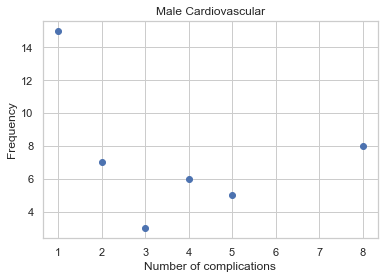

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_male['Number of complications'], df_male['Frequency'])
plt.xlabel("Number of complications")
plt.ylabel("Frequency")
plt.title("Male Cardiovascular")
plt.show()

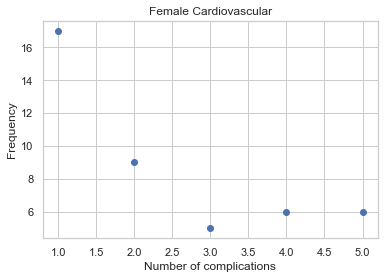

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_female['Number of complications'], df_female['Frequency'])
plt.xlabel("Number of complications")
plt.ylabel("Frequency")
plt.title("Female Cardiovascular")
plt.show()

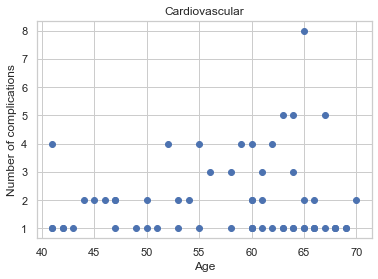

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(condense_complications['Age'], condense_complications['Number of complications'])
plt.xlabel("Age")
plt.ylabel("Number of complications")
plt.title("Cardiovascular")
plt.show()

In [47]:
#Creating compiled White cohort with disease information
#white_cohort = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\reference_cohort_white_british.txt", sep='\t')
#df_white = pd.DataFrame(columns = ['Disease', 'Cases', 'Count', 'Prevalence', 'Case list', 'Control list'])
#folder2 = os.listdir("C:\\Users\\Huy\\Desktop\\Dataset\\phecode_cohorts")
#white_list = white_cohort.eid.tolist()
#for file2 in folder2:
#    cases2 = 0
#    count2 = 0
#    white_count = 0
#    eid2_list = []
#    control2_list = []
#    disease2 = pd.read_csv(r"C:\\Users\\Huy\\Desktop\\Dataset\\phecode_cohorts\\" + file2, sep='\t')
#    for patient2 in disease2['eid']:
#        if patient2 in white_list:
#            white_count += 1
#            if disease2['Status'][count2] == 1:
#                cases2 += 1
#                eid2_list.append(patient2)
#            else:
#                control2_list.append(patient2)
#        count2 += 1
#    if cases2 != 0:
#        prevalence2 = cases2 / white_count
#        df_white = df_white.append({'Disease': file2, 'Cases': cases2, 'Count': white_count, 'Prevalence': prevalence2, 'Case list': eid2_list, 'Control list': control2_list}, ignore_index=True)
#df_white.sort_values(by=['Prevalence'], inplace=True, ascending=False)